In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from public_tests import *
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


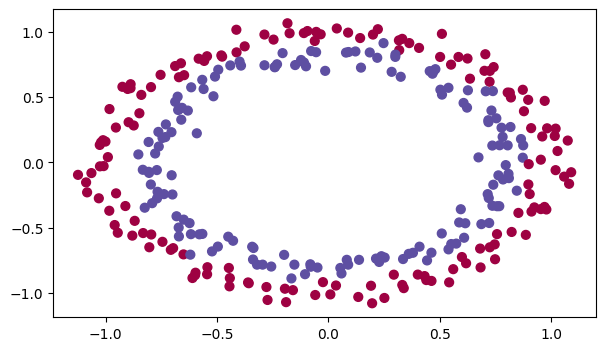

In [34]:
train_X , train_Y , test_X , test_Y = load_dataset()

In [35]:
def model(X , Y , learning_rate = 0.01 , num_iterations = 15000 , print_cost = True , initialization = "he"):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0] , 10 , 5 , 1]

    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)


    for i in range(num_iterations):
        a3 , cache = forward_propagation(X , parameters)

        cost = compute_loss(a3 , Y)

        grads = backward_propagation(X , Y , cache)

        parameters = update_parameters(parameters , grads , learning_rate)


        if print_cost and i & 1000 == 0:
            print("Cost after iteration {} : {}".format(i , cost))
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters



In [36]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)

    for l in range(1 , L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l] , layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l] , 1))

    return parameters

In [37]:
parameters = initialize_parameters_zeros([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0 : 0.6931471805599453
Cost after iteration 1 : 0.6931471805599453
Cost after iteration 2 : 0.6931471805599453
Cost after iteration 3 : 0.6931471805599453
Cost after iteration 4 : 0.6931471805599453
Cost after iteration 5 : 0.6931471805599453
Cost after iteration 6 : 0.6931471805599453
Cost after iteration 7 : 0.6931471805599453
Cost after iteration 16 : 0.6931471805599453
Cost after iteration 17 : 0.6931471805599453
Cost after iteration 18 : 0.6931471805599453
Cost after iteration 19 : 0.6931471805599453
Cost after iteration 20 : 0.6931471805599453
Cost after iteration 21 : 0.6931471805599453
Cost after iteration 22 : 0.6931471805599453
Cost after iteration 23 : 0.6931471805599453
Cost after iteration 1024 : 0.6931471805599453
Cost after iteration 1025 : 0.6931471805599453
Cost after iteration 1026 : 0.6931471805599453
Cost after iteration 1027 : 0.6931471805599453
Cost after iteration 1028 : 0.6931471805599453
Cost after iteration 1029 : 0.6931471805599453
Cost a

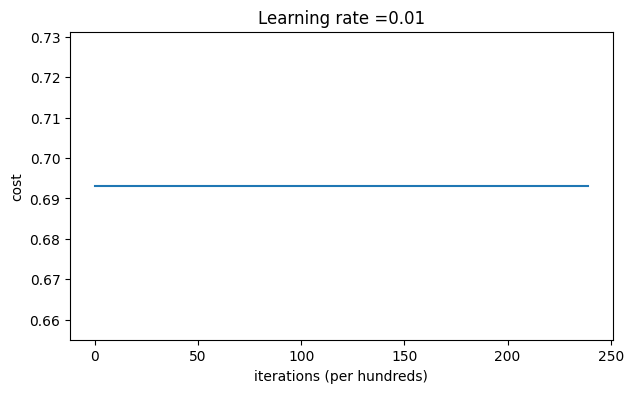

On the train set:
Accuracy: 0.5
On the test set:


In [39]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")

In [41]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)               
    parameters = {}
    L = len(layers_dims)            
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [42]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


d:\DeepLearningCodes\Improving DNN\Week 1\Initialization\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
d:\DeepLearningCodes\Improving DNN\Week 1\Initialization\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0 : inf
Cost after iteration 1 : inf
Cost after iteration 2 : inf
Cost after iteration 3 : inf
Cost after iteration 4 : inf
Cost after iteration 5 : inf
Cost after iteration 6 : inf
Cost after iteration 7 : inf
Cost after iteration 16 : inf
Cost after iteration 17 : inf
Cost after iteration 18 : inf
Cost after iteration 19 : inf
Cost after iteration 20 : inf
Cost after iteration 21 : inf
Cost after iteration 22 : inf
Cost after iteration 23 : inf
Cost after iteration 1024 : 0.6217882290562601
Cost after iteration 1025 : 0.6213866974673586
Cost after iteration 1026 : 0.6216322669392078
Cost after iteration 1027 : 0.6212684004761063
Cost after iteration 1028 : 0.6214810298409102
Cost after iteration 1029 : 0.6211524554351918
Cost after iteration 1030 : 0.6213346910873843
Cost after iteration 1031 : 0.6210390397342747
Cost after iteration 1040 : 0.620681185862307
Cost after iteration 1041 : 0.620515785649562
Cost after iteration 1042 : 0.6205667847717696
Cost after it

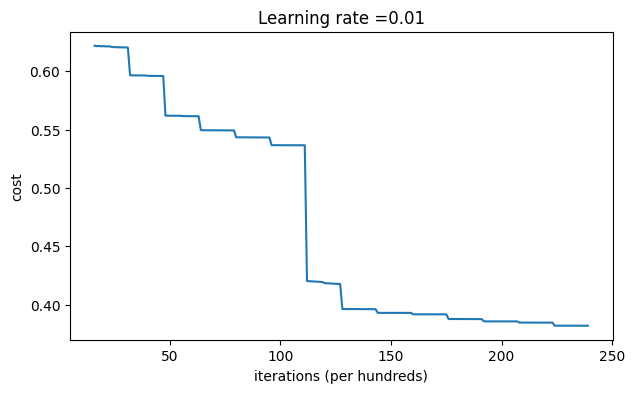

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [43]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [44]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 
    import math
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*math.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))*math.sqrt(2./layers_dims[l-1])
        
        
    return parameters

In [45]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0 : 0.8830537463419761
Cost after iteration 1 : 0.8790931244852936
Cost after iteration 2 : 0.8752665929773289
Cost after iteration 3 : 0.8715820358942987
Cost after iteration 4 : 0.8679953859733419
Cost after iteration 5 : 0.8644883955199806
Cost after iteration 6 : 0.8610699493608119
Cost after iteration 7 : 0.8577379812866714
Cost after iteration 16 : 0.8314802648971598
Cost after iteration 17 : 0.8289332142793165
Cost after iteration 18 : 0.8264453926369136
Cost after iteration 19 : 0.8240149361879169
Cost after iteration 20 : 0.8216527422581981
Cost after iteration 21 : 0.8193433822529704
Cost after iteration 22 : 0.8170941509896289
Cost after iteration 23 : 0.8149142894398856
Cost after iteration 1024 : 0.6876667371753381
Cost after iteration 1025 : 0.687653639305546
Cost after iteration 1026 : 0.687640549862534
Cost after iteration 1027 : 0.6876276529170967
Cost after iteration 1028 : 0.6876150069753207
Cost after iteration 1029 : 0.6876023671464072
Cost aft

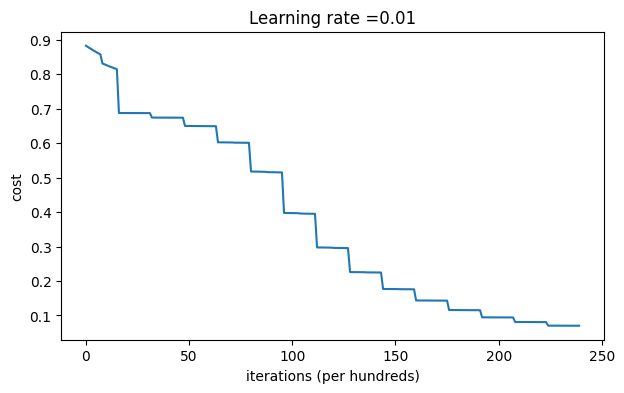

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [46]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)